In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

In [8]:
BASE_DIR = os.path.abspath('')
DATA_DIR = os.path.join(BASE_DIR, '..', 'data')

In [55]:
df = pd.read_csv(os.path.join(DATA_DIR, 'annotation_tweets_clean.tsv'), sep='\t')
df['metrics'] = [json.loads(s) for s in df['metrics']]

metrics = []
likes = []
retweets = []
sent = []
# by topic
for topic in range(1,7):
    df_topic = df[df['coding'] == topic]
    
    sent_topic = []
    for s in range(-1,2):
        df_sent = df_topic[df_topic['sentiment'] == s]
        l = df_sent.to_records(index=False)
        sent_likes = sum([x[1]['like_count'] for x in l])
        sent_retweets = sum([x[1]['retweet_count'] for x in l])
        sent_topic.append((sent_likes,sent_retweets))
    sent.append(sent_topic)
    
    l = df_topic.to_records(index=False)
    total_likes = sum([x[1]['like_count'] for x in l])
    total_retweets = sum([x[1]['retweet_count'] for x in l])
    metrics.append((total_likes, total_retweets))

    top10_liked = sorted(l, key=lambda x: x[1]['like_count'], reverse=True)[:10]
    likes.append(top10_liked)
    top10_retweeted = sorted(l, key=lambda x: x[1]['retweet_count'], reverse=True)[:10]
    retweets.append(top10_retweeted)

In [15]:
topics = list(range(1,7))
avg_sent = {1: -0.1979, 2: -0.1058, 3: -0.0526, 4: -0.1714, 5: -0.0966, 6: -0.0755}

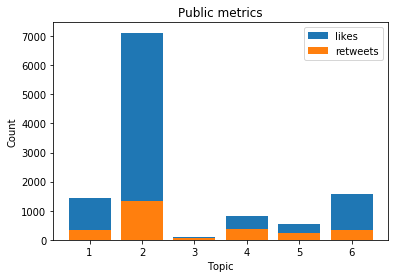

In [56]:
plt.bar(topics,[x[0] for x in metrics], label='likes')
plt.bar(topics,[x[1] for x in metrics], label='retweets')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Public metrics')
plt.legend()
# plt.savefig('public_metrics.png')
plt.show()

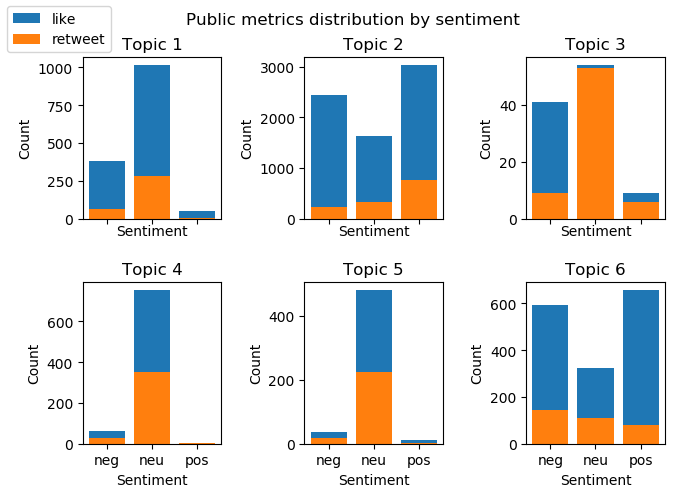

In [121]:
labels = ['neg', 'neu', 'pos']

fig, axs = plt.subplots(2, 3, sharex=True, figsize=(7, 5), dpi=100)
fig.suptitle('Public metrics distribution by sentiment')
for i in range(len(sent)):
    lk,rt=zip(*sent[i])
    a = axs[i//3, i%3].bar(labels, lk)
    b = axs[i//3, i%3].bar(labels, rt)
    axs[i//3, i%3].set_title(f'Topic {i+1}')
#     if i == 2:
#         axs[i//3, i%3].legend([a,b],['like', 'retweet'], loc='upper right')
    
fig.tight_layout(pad=2.5)
fig.legend([a,b],['like', 'retweet'], loc='upper left')
for ax in axs.flat:
    ax.set(xlabel='Sentiment', ylabel='Count')


# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# fig.text(0.5, 0.04, 'Sentiment', ha='center')
# fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')
fig.savefig('sent.png')
# for i in range(len(sent)):
#     lk,rt=zip(*sent[i])
#     plt.bar(labels, lk, label='likes')
#     plt.bar(labels, rt, label='retweets')
#     plt.title(f'topic{i+1}')
#     plt.show()

In [66]:
a

(384, 1017, 49)